# Perkenalan

**Nama**: Muhammad Iqbal Saputra

**NIM**: 2702390236

**Objective**: Objektif dari program ini adalah untuk membuat model klasifikasi menggunakan Logistic Regression, SVC, KNN, Decision Tree, Random Forest, dan AdaBoostClassifier untuk memprediksi apakah pengiriman akan tepat waktu atau tidak.

[Dataset](https://www.kaggle.com/datasets/nayanack/shipping/data)

# Import Libraries

In [41]:
# Library Dataframe
import pandas as pd

# Library Numerical Data
import numpy as np

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Statistics
from scipy import stats
from scipy.stats import pearsonr, kendalltau, spearmanr, uniform, randint

# Library Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from imblearn.over_sampling import SMOTE
# Libraries for Modeling ML
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score,KFold, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, roc_auc_score,mean_squared_error, root_mean_squared_error, r2_score, accuracy_score , classification_report , confusion_matrix,precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.outliers import Winsorizer
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.tree import DecisionTreeClassifier

# lib pipelines
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
# Model Saving
import pickle
import json
import joblib

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

import string

# Data Loading

### **Column Description**


| Feature   | Description                                                                                                           |
| ----------|-----------------------------------------------------------------------------------------------------------------------|
| ID      | ID Number of Customers.|
| Warehouse block       | The Company have big Warehouse which is divided in to block such as A,B,C,D,E.|
| Mode of shipment       | The Company Ships the products in multiple way such as Ship, Flight and Road.|
| Customer care calls      | The number of calls made from enquiry for enquiry of the shipment.
| Customer rating      | The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
| Cost of the product      | Cost of the Product in US Dollars.
| Prior purchases     | The Number of Prior Purchase.
| Product importance    | The company has categorized the product in the various parameter such as low, medium, high.
| Gender    | Male and Female.| 
| Discount offered       | Discount offered on that specific product.|
| Weight in gms   | It is the weight in grams.|
| Reached on time      | It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


In [42]:
# Make new dataset
df = pd.read_csv('shipping.csv')
# Show first 10 data
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [43]:
# Show last 10 data
df.tail(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,0
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,0
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [44]:
# Duplicate Dataset
new_data = df.copy()

In [45]:
# Show dataset info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dari informasi dataset tersebut kita dapat melihat bahwa:
* Terdapat `12` kolom di dalam dataset
* Tipe data terdiri dari `8` **integer** dan `4` **object**
* Terdapat `10999` entri dalam kumpulan data


In [46]:
# Drop column ID
new_data=new_data.drop(['ID'],axis=1)

# Exploratory Data Analysis

In [47]:
# Describe dataset
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [48]:
# Count duplicated data
new_data.duplicated().sum()

0

**Tidak ada data yang duplikat**

In [49]:
# Menampilkan info data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [50]:
# Splitting between numerical and categorical columns
num_columns = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_columns = [col for col in new_data.columns if col not in num_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
Numcerical Columns:  ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


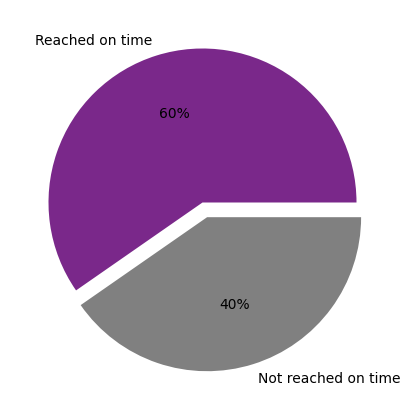

In [51]:
fig = plt.subplots(figsize=(16, 5))
plt.pie(new_data['Reached.on.Time_Y.N'].value_counts(), labels=['Reached on time', 'Not reached on time'], explode=[0, 0.1], autopct='%.0f%%', colors=['#7A288A', '#808080'])
plt.show()

Visualisasi data menunjukkan bahwa pengiriman yang `not reached on time` mencapai `60%`, sedangkan yang `reached on time` hanya `40%`. Hal ini mengindikasikan adanya ketidakseimbangan (imbalance) dalam distribusi data.

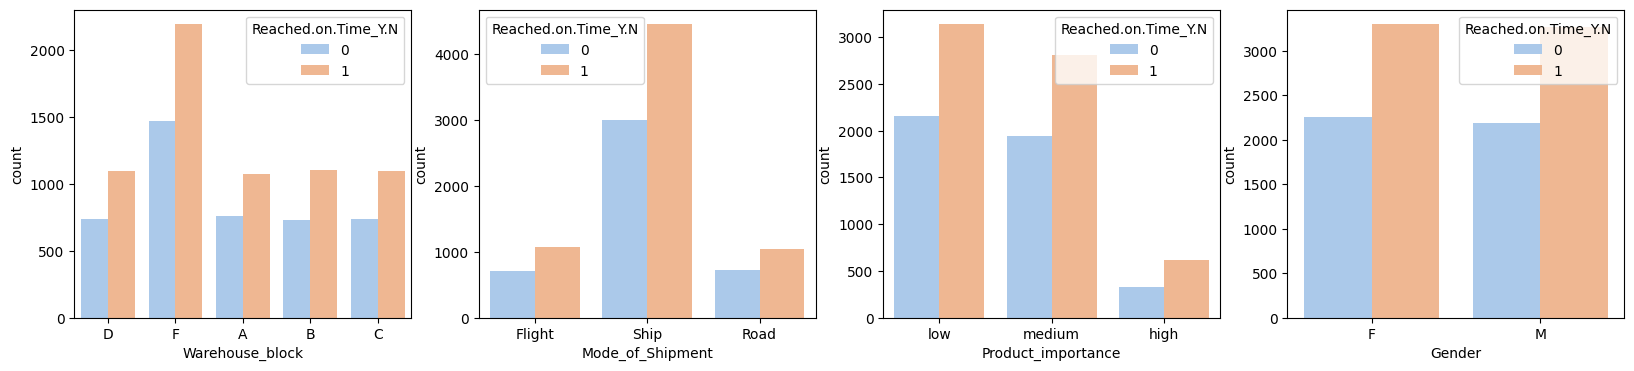

In [52]:
# Select the categorical columns
cat_columns = new_data.select_dtypes(include=['object']).columns

# Create a figure with a specified size
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for i, col in enumerate(cat_columns[:4]):
    sns.countplot(data=new_data, x=col, hue=new_data['Reached.on.Time_Y.N'], palette='pastel', ax=axs[i])

# Show the plot
plt.show()

**Penjelasan**
* **warehouse_block**: Pada blok F terdapat banyak pengiriman yang `not reached on time`.
* **mode_of_shipment**: Pada metode pengiriman `ship` ditemukan banyak pengiriman yang `not reached on time`.
* **product_importance**: Pada tingkat kepentingan produk `low` terdapat banyak pengiriman yang `not reached on time`.
* **gender**: Pada kedua jenis kelamin ditemukan banyak pengiriman yang `not reached on time`.


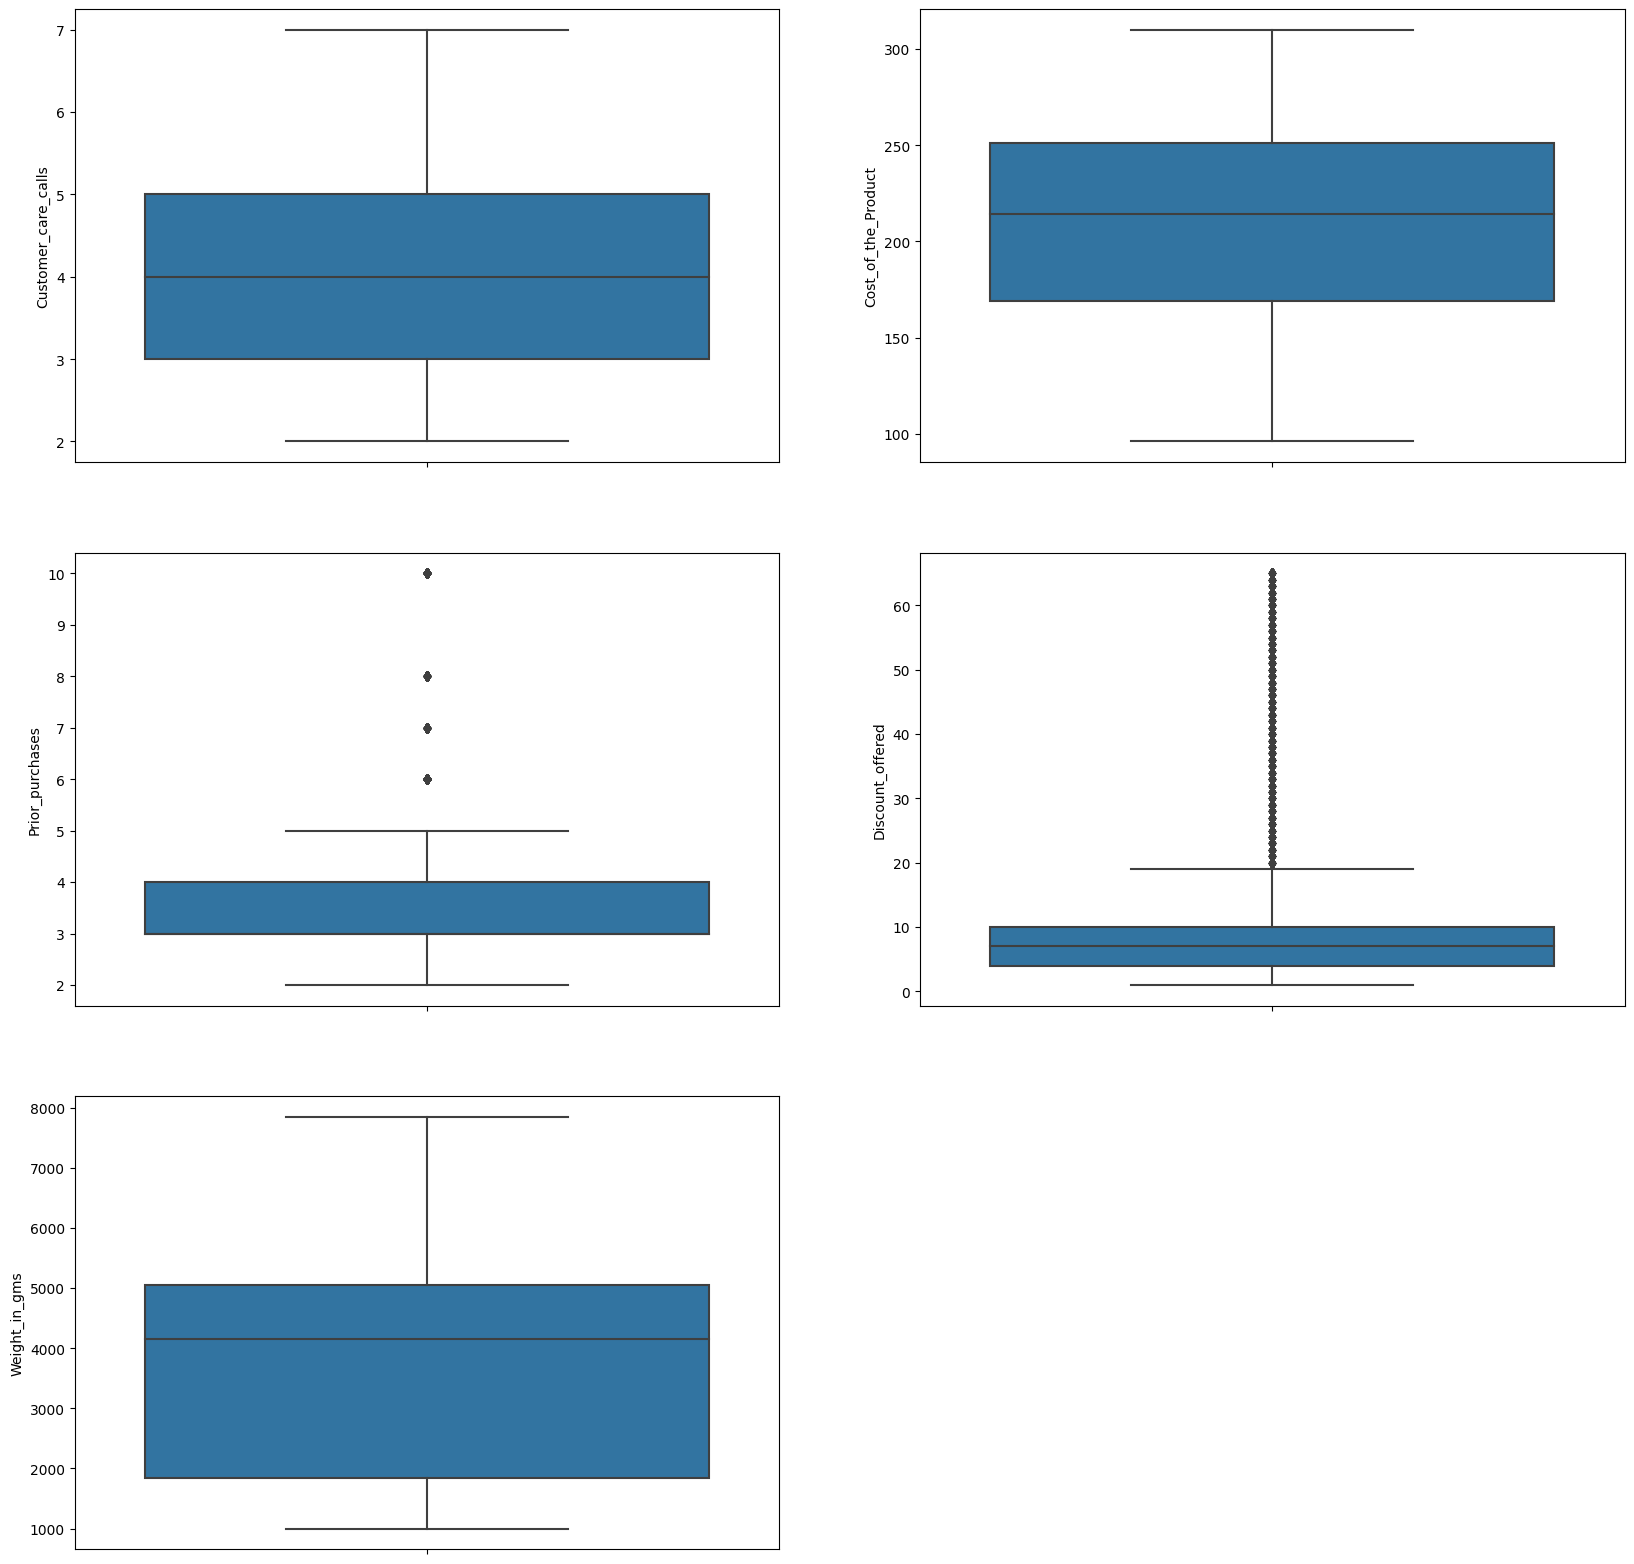

In [53]:
# Check the outliers of numerical data
fig = plt.figure(figsize=(20, 20))
cols = num_columns
num_rows = 3
num_cols = 2

for index in range(1, num_rows*num_cols):
    fig.add_subplot(num_rows, num_cols, index)
    sns.boxplot(data=new_data, y=cols[index-1])
plt.show()

kolom `Prior_purhcase` dan `Discount_offered` :
- terdapat banyak **outliers** yang harus di handle

Text(0.5, 1.0, 'Type of shipments (Most Used)')

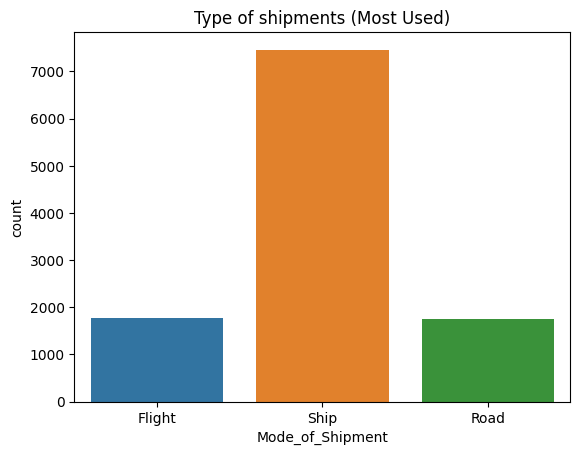

In [54]:
# Plot kolom pengiriman
sns.countplot(data=new_data,x="Mode_of_Shipment")
plt.title("Type of shipments (Most Used)")

**Pengiriman lebih banyak menggunakan kapal**

Text(0.5, 1.0, 'Model of shipment vs product_cost')

<Figure size 1000x600 with 0 Axes>

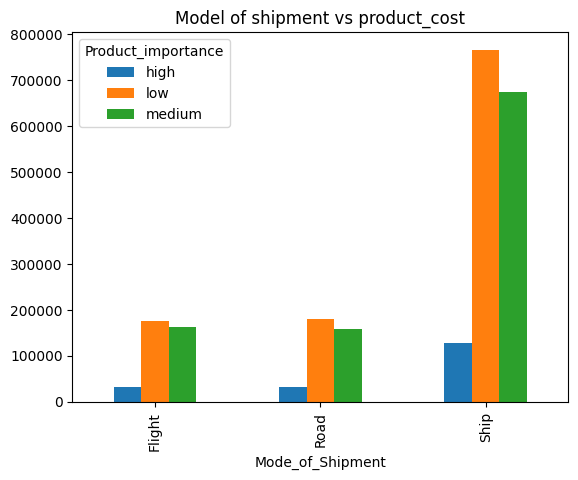

In [55]:
# Perbandingan metode pengiriman
plt.figure(figsize=(10,6))
grouped=df.groupby(["Mode_of_Shipment","Product_importance"])["Cost_of_the_Product"].sum().unstack()
ax=grouped.plot(kind="bar")
plt.title("Model of shipment vs product_cost")

Text(0.5, 1.0, 'Model of shipment vs Weight_in_gms ')

<Figure size 1000x600 with 0 Axes>

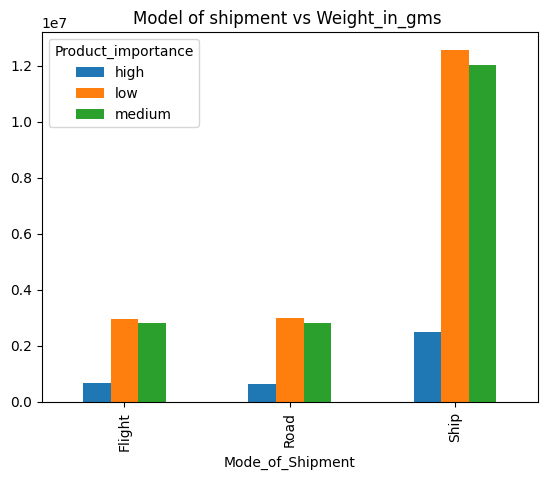

In [56]:
# Perbandingan metode pengiriman
plt.figure(figsize=(10,6))
grouped=df.groupby(["Mode_of_Shipment","Product_importance"])["Weight_in_gms"].sum().unstack()
ax=grouped.plot(kind="bar")
plt.title("Model of shipment vs Weight_in_gms ")

Text(0.5, 1.0, 'Model of shipment vs Discount_offered ')

<Figure size 1000x600 with 0 Axes>

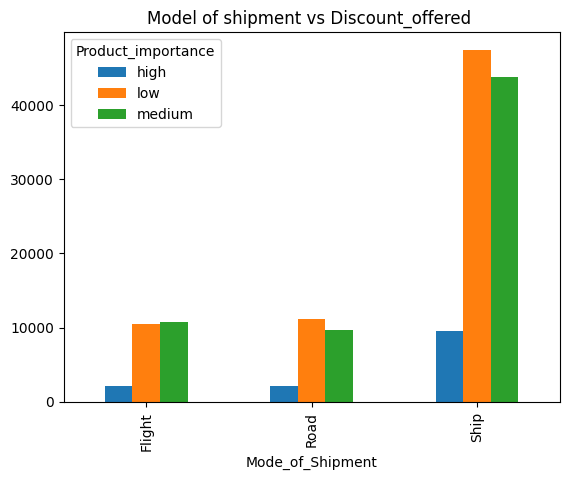

In [57]:
# Perbandingan metode pengiriman
plt.figure(figsize=(10,6))
grouped=df.groupby(["Mode_of_Shipment","Product_importance"])["Discount_offered"].sum().unstack()
ax=grouped.plot(kind="bar")
plt.title("Model of shipment vs Discount_offered ")

**Penjelasan**  
Untuk diskon kapal ditawarkan lebih banyak dan juga karena harga dan berat produk semakin banyak orang yang memilih kapal

# Feature Engineering


### **Handling Cardinality**

In [58]:
# Check dataset info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [59]:
# Splitting between numerical and categorical columns
num_columns = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_columns = [col for col in new_data.columns if col not in num_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
Numcerical Columns:  ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


**Penjelasan**  
membagi kolom menjadi kolom numerik dan kategorikal agar lebih mudah dianalisis

In [60]:
# Making empty list for appending the unique values
cat_columns_unique = []
# Inspect the Number of Different Labels, for Different Categorical Variables
for cat in cat_columns:
    cat_columns_unique.append([cat, new_data[cat].nunique()])

# Showing dataframe consisting 
pd.DataFrame(data=cat_columns_unique, columns=['categorical_column', 'unique_value'])

,categorical_column,unique_value
0,Warehouse_block,5
1,Mode_of_Shipment,3
2,Customer_rating,5
3,Product_importance,3
4,Gender,2
5,Reached.on.Time_Y.N,2



| Kolom                   | Unique Value |
|-------------------------|--------------|
| Warehouse_block         | 5            |
| Mode_of_Shipment        | 3            |
| Customer_rating         | 5            |
| Product_importance      | 3            |
| Gender                  | 2            |
| Reached.on.Time_Y.N     | 2            |


### Splitting Between X and Y


In [61]:
# Split fitur X dan Y
X = new_data.drop('Reached.on.Time_Y.N', axis=1)
y = new_data['Reached.on.Time_Y.N']

### Splitting Between Train and Test


In [62]:
# Split train dan test menggunakan pareto principle
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2 ,random_state=43)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (8799, 10)
Test Size (2200, 10)


In [63]:
# Splitting numerical dan categorical columns
num_columns = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_columns = [col for col in new_data.columns if col not in num_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
Numcerical Columns:  ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


### **Handling Missing Value**

In [64]:
# Check null in dataset
X_train.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [65]:
# Check null in dataset
X_test.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [66]:
# Check null in dataset
y_train.isnull().sum()

0

In [67]:
# Check null in dataset
y_test.isnull().sum()

0

**Tidak terdapat missing value dalam data**

### **Handling Outliers**

In [68]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for num in num_columns:
    skewness = X_train[num].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Elif the data has low skewness
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has low skewness
    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has high skewness
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

In [69]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,Customer_care_calls,0.382963
1,Cost_of_the_Product,-0.179086
2,Weight_in_gms,-0.254884


Kolom  `Customer_care_calls`, `Cost_of_the_Product`, dan `Weight_in_gms ` adalah **normal distribution**

In [70]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,Prior_purchases,1.651716,high
1,Discount_offered,1.808977,high


Kolom `Prior_purchases`, dan `Discount_offered` adalah **skew distribution**

In [71]:
# Capping Method for Normal Distribution  
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test)

Capping kolom yang **terdistribusi normal**

In [72]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed)

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

Capping kolom **terdistribusi skew**

In [73]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Fungsi untuk menunjukkan perbedaan setiap kolom sebelum dan sesudah penanganan outlier

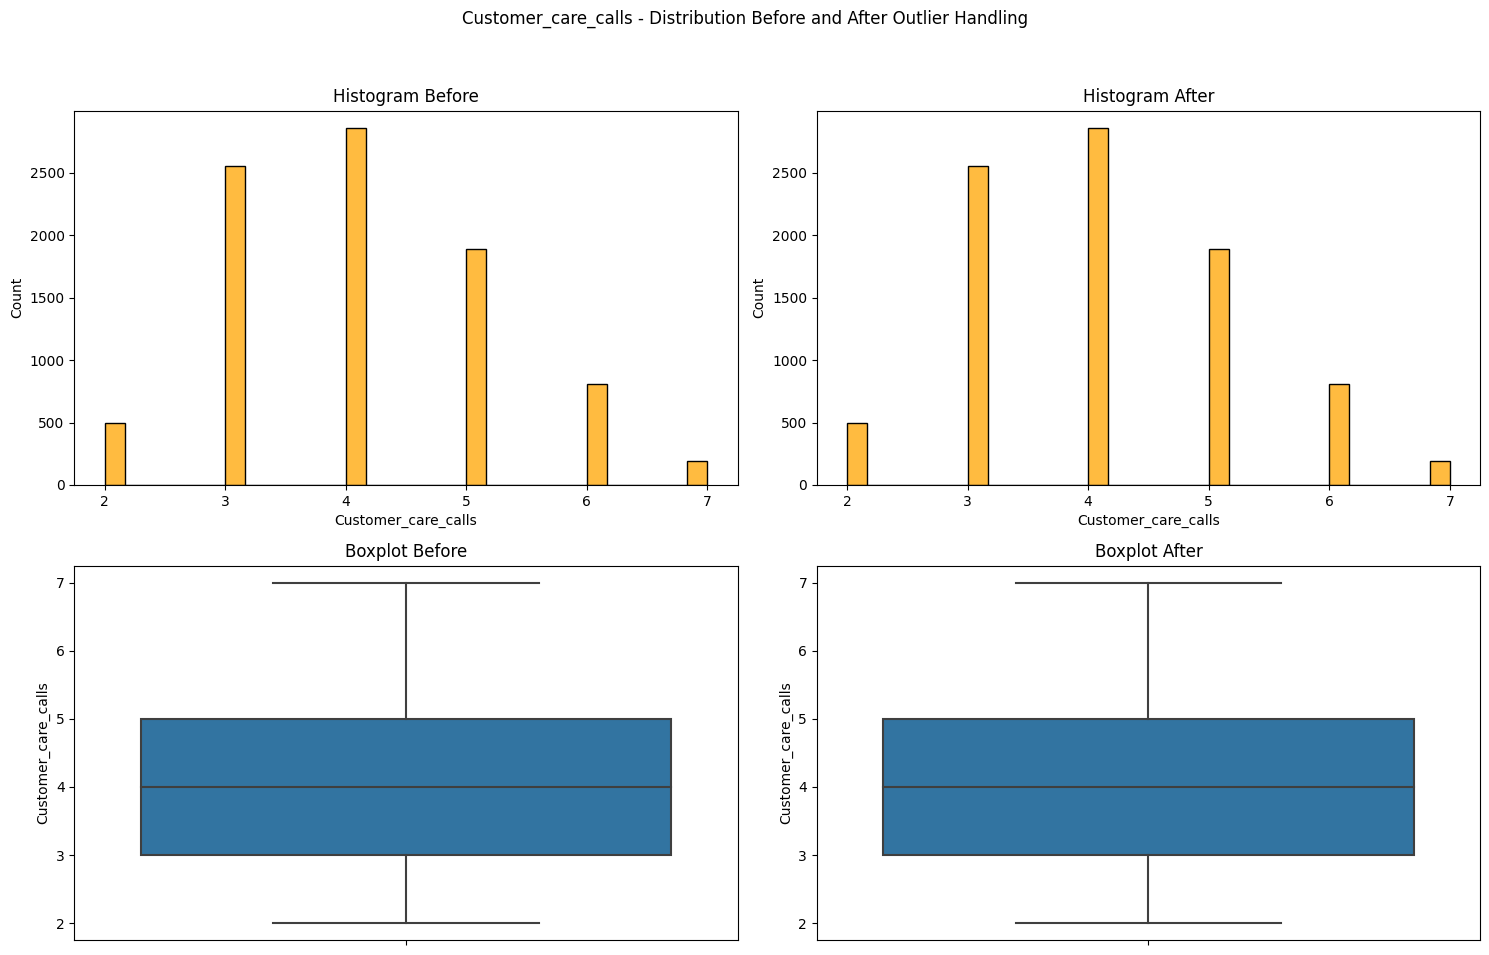

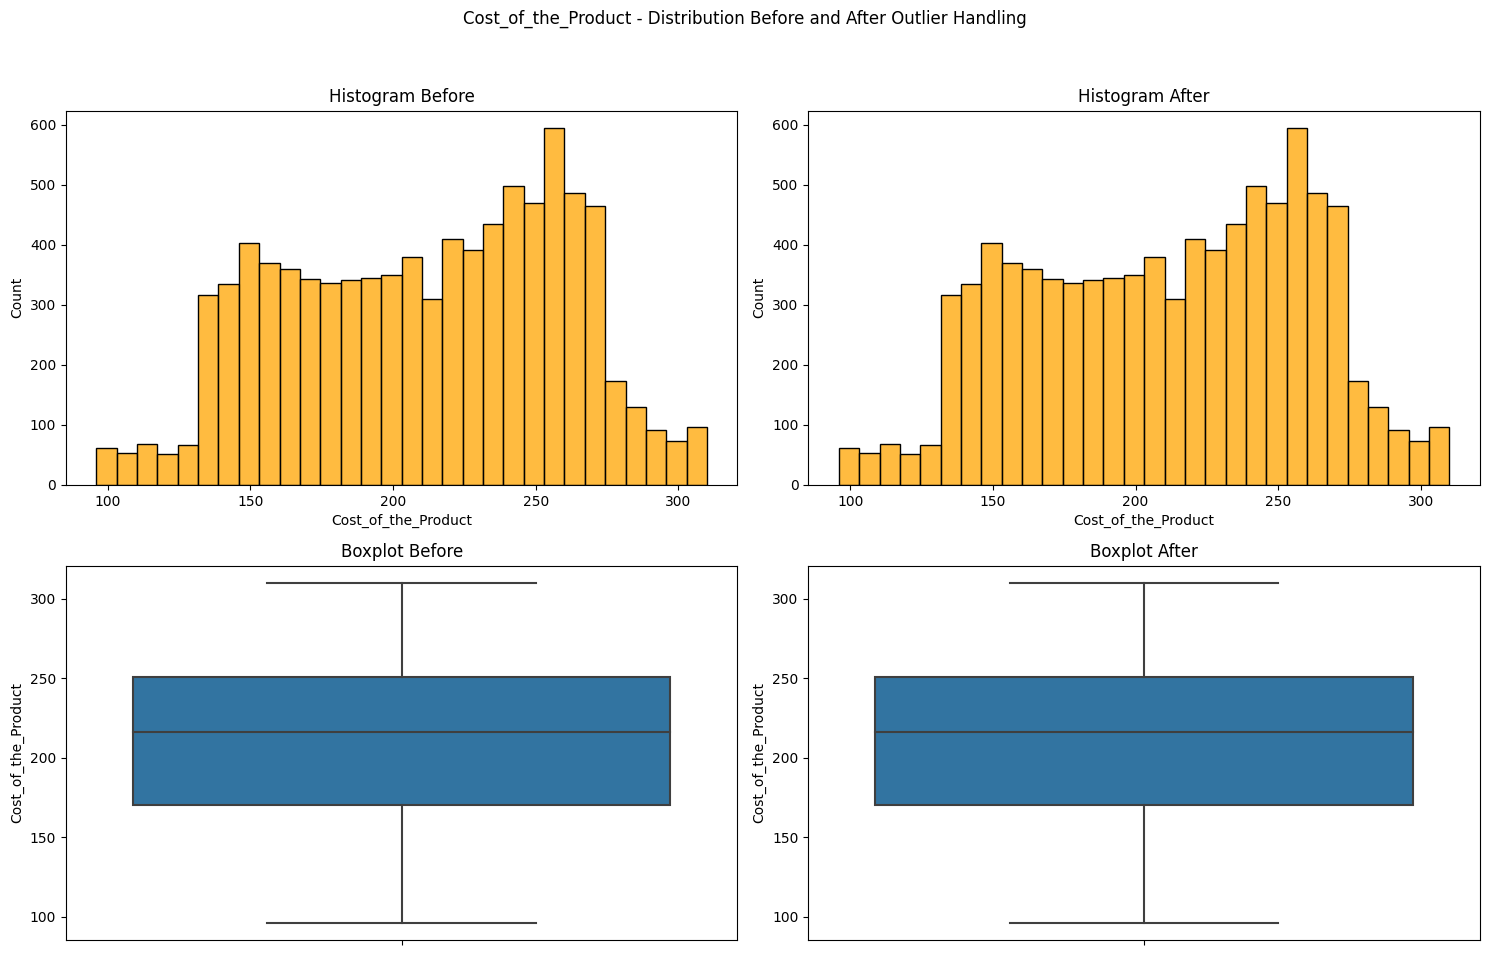

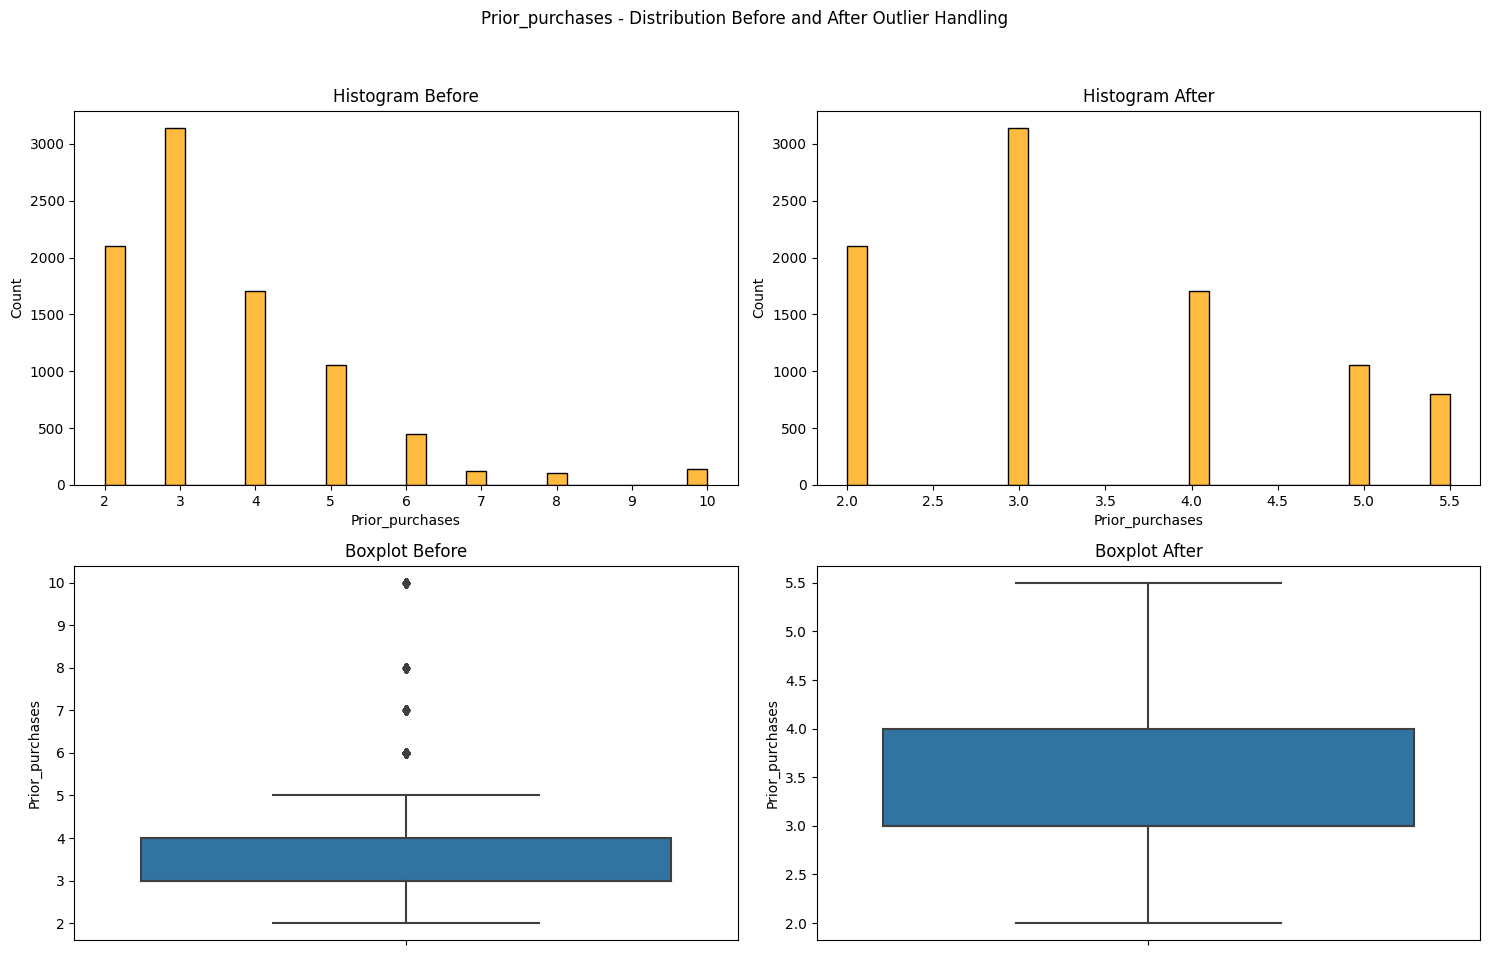

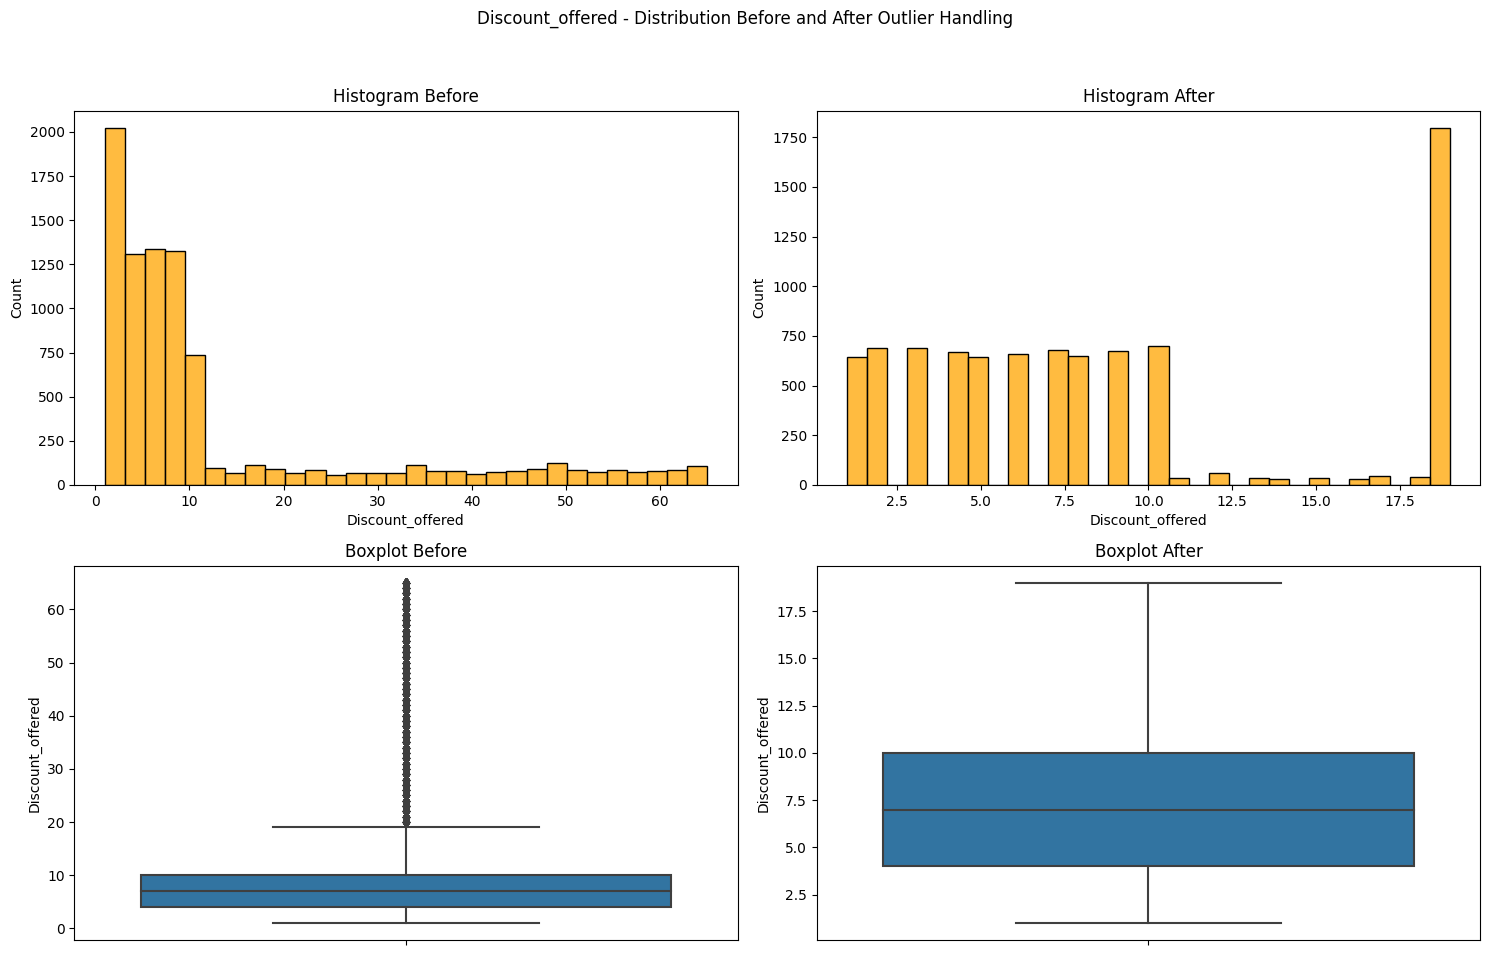

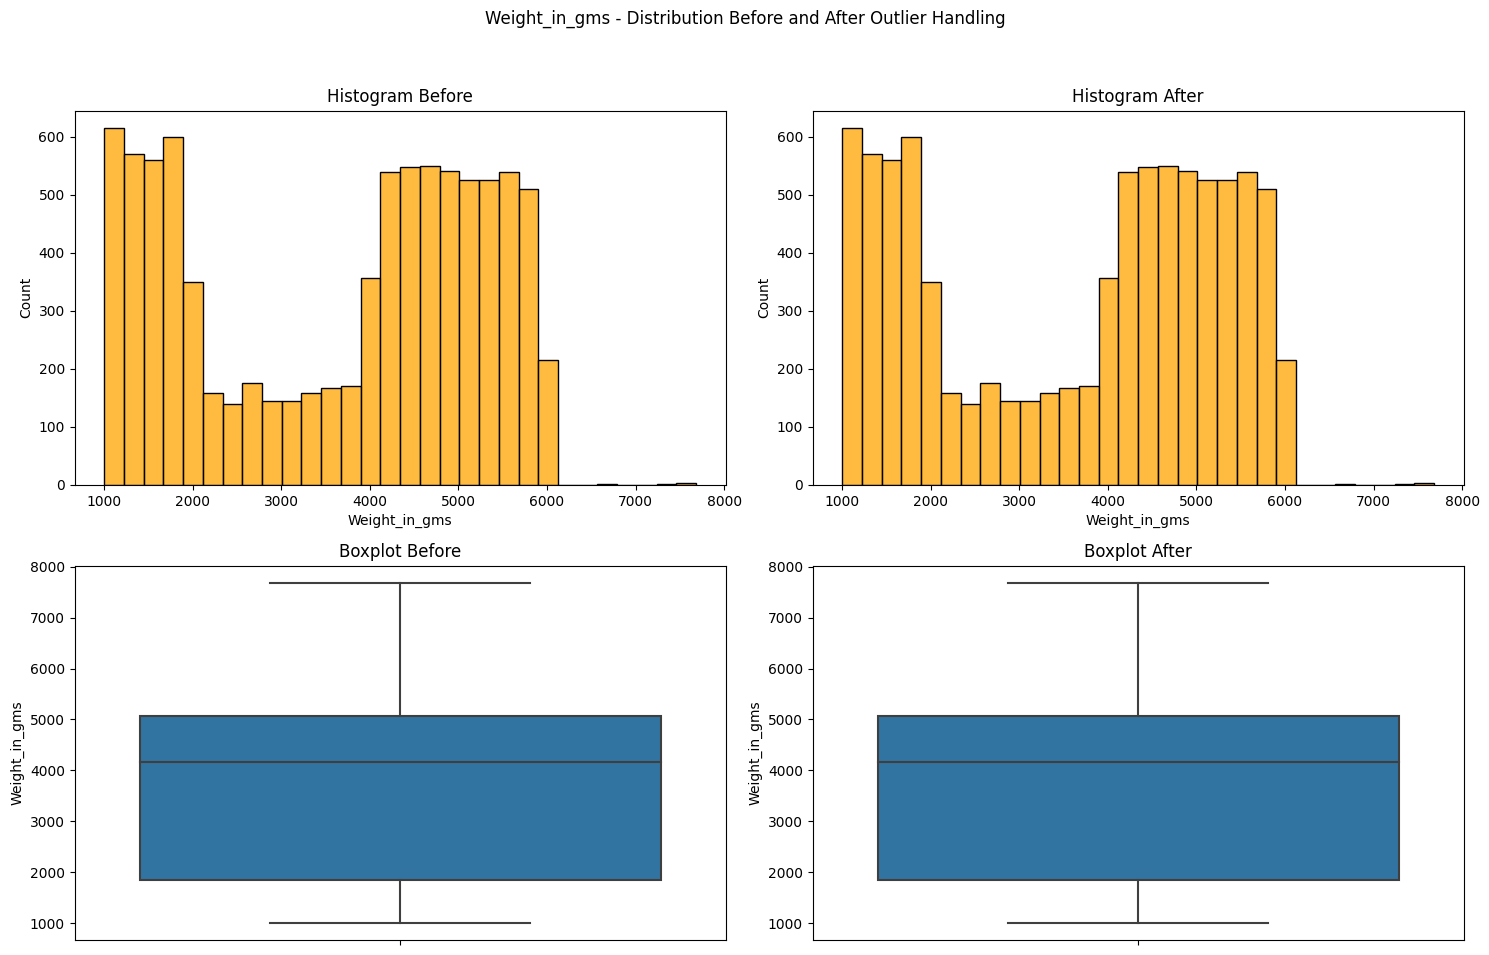

In [74]:
# Looping untuk kolom numerik
for num in num_columns:
    outlier_handling_plot_comparison(X_train, X_train_capped, num)

Before dan after setelah di capping

### **Splitting Numerical and Categorical Data**

In [75]:
# Splitting between numerical and categorical columns
num_columns = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender']

print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender']
Numcerical Columns:  ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


In [76]:
# Splitting the train and test features into categorical and numerical columns
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

X_train_cat

,Warehouse_block,Mode_of_Shipment,Customer_rating,Product_importance,Gender
4126,C,Flight,3,low,M
9145,F,Ship,3,low,M
7852,C,Ship,5,high,M
7754,A,Ship,5,low,M
2,A,Flight,2,low,M
...,...,...,...,...,...
2064,D,Flight,4,medium,F
10517,F,Ship,5,low,M
7985,F,Ship,3,high,M
2303,F,Road,3,medium,F


In [77]:
# Menampilkan kolom numerik pada X_train
X_train_num

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
4126,4,249,3.0,5,5017
9145,6,279,4.0,7,1090
7852,3,150,3.0,6,4565
7754,7,285,4.0,6,1591
2,2,183,4.0,19,3374
...,...,...,...,...,...
2064,3,156,4.0,7,1492
10517,5,141,3.0,4,4534
7985,4,154,5.5,7,5317
2303,3,181,2.0,19,3236


### **Feature Selection**

Untuk uji korelasi antar data kategorikal, kita akan menggunakan uji korelasi **kendall**

In [78]:
# Finding the correlation between categorical columns and Y Train using Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []

for col in X_train_cat.columns: # pyright: ignore[reportAttributeAccessIssue]
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05: # type: ignore
    interpretation.append('Significant')
    selected_cat_cols.append(col)
  else :
    interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Warehouse_block,0.007675,0.423555,Not Significant
1,Mode_of_Shipment,-0.000864,0.932988,Not Significant
2,Customer_rating,0.005893,0.536566,Not Significant
3,Product_importance,-0.020344,0.048703,Significant
4,Gender,0.006460,0.544579,Not Significant


Kolom kategorik yang memiliki korelasi significant adalah kolom **Product_impotance**

In [79]:
#Finding the correlation between numerical columns and Y Train using pearsonr and spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_num.columns: # type: ignore
  if abs(X_train_num[col].skew()) < 0.5:                     # type: ignore
    # For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05: # type: ignore
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:                                                     
    # For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05: # type: ignore
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Customer_care_calls,-0.068262,1.457528e-10,Significant
1,Cost_of_the_Product,-0.077425,3.525778e-13,Significant
2,Prior_purchases,-0.073431,5.333542e-12,Significant
3,Discount_offered,0.336459,8.021495e-232,Significant
4,Weight_in_gms,-0.266306,9.727169e-143,Significant


Kelima kolom tersebut memiliki korelasi yang significant
`Customer_care_calls`,`Cost_of_the_Product`,`Prior_purchases`,`Discount_offered`,dan `Weight_in_gms`

In [80]:
# Show selected columns based on the correlation test
print(selected_cat_cols)
print(selected_num_cols)

['Product_importance']
['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


In [81]:
# Updating Numerical and Categorical Columns
X_train_cat = X_train_cat[selected_cat_cols]
X_train_num = X_train_num[selected_num_cols]

X_test_cat = X_test_cat[selected_cat_cols]
X_test_num = X_test_num[selected_num_cols]

# Show first five data from the updated X_train
X_train_num

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
4126,4,249,3.0,5,5017
9145,6,279,4.0,7,1090
7852,3,150,3.0,6,4565
7754,7,285,4.0,6,1591
2,2,183,4.0,19,3374
...,...,...,...,...,...
2064,3,156,4.0,7,1492
10517,5,141,3.0,4,4534
7985,4,154,5.5,7,5317
2303,3,181,2.0,19,3236


In [82]:
# Menampilkan kolom katogerik pada X_train
X_train_cat

,Product_importance
4126,low
9145,low
7852,high
7754,low
2,low
...,...
2064,medium
10517,low
7985,high
2303,medium


Memperbarui dan memisahkan `X_train` dan `X_test` untuk hanya menampilkan kolom numerik dan kategorikal yang berkorelasi signifikan dengan kolom target. Setelah pemisahan ini, kita dapat beralih ke `feature scaling` dan `feature encoding`.


Untuk `feature scalling`, kita akan menggunakan `MinMax Scaler` untuk menskalakan data ke rentang tertentu. Ini akan membantu menormalkan data dan memastikan bahwa semua fitur memiliki skala yang sama. `MinMax Scaler` berguna ketika fitur memiliki unit atau range yang berbeda, karena dapat mencegah fitur yang memiliki banyak outlier.


# Pipeline

Pipeline mengotomatisasi alur kerja machine learning, memungkinkan data untuk diubah dan dikorelasikan ke dalam model secara otomatis. Karena kita ingin melihat model klasifikasi mana yang bekerja paling baik untuk dataset ini, **pipeline dapat menghemat banyak waktu dan usaha**.

Ada beberapa `langkah` yang akan kita gunakan dalam semua model pipeline kita, seperti:

1. Untuk **`Feature Scaling`** dalam pipeline ini, kita akan menggunakan `MinMax Scaler` untuk menskalakan data ke rentang tertentu, yang dapat membantu menormalkan data dan memastikan semua fitur memiliki skala yang sama. `MinMax Scaler` berguna ketika fitur memiliki unit atau rentang yang berbeda, karena dapat mencegah fitur dengan rentang yang lebih besar mendominasi proses pembelajaran.

2. Untuk membuat **`Pipeline dengan Banyak Variabel`**, dalam kasus kita data numerik dan kategorikal, kita akan menggunakan `Column Transformer` karena memungkinkan kita untuk **menggunakan langkah-langkah preprocessing yang berbeda** untuk setiap tipe data.

3. Untuk **`Definisi Model`**, kita akan menggunakan model `Random Forest` dan `AdaBoost`, untuk melihat model mana yang paling cocok dengan data.

4. Untuk **`Pelatihan Model`**, kita akan melatih setiap model dengan fitur akhir dan target yang seimbang.

5. Untuk **`Evaluasi Model`**, kita akan mengukur `recall`, karena kita ingin mengevaluasi **false negative**. False negative dalam konteks ini berarti pengiriman yang sebenarnya terlambat tetapi diprediksi tepat waktu, yang dapat menyebabkan masalah operasional.

6. Untuk **`Cross Validation`**, kita menggunakan `K-fold cross validation` karena kita ingin **mengurangi overfitting** dan mendapatkan evaluasi model yang lebih akurat.


### **SVM**

In [83]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, SVC(kernel='rbf', probability=True, class_weight='balanced'))

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
svm_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(svm_results_df)

Train Recall Score Before Tuning : 
 0.4372492836676218 

Test Recall Score Before Tuning: 
 0.4435240963855422 

           Metric     Value
0    Train Recall  0.437249
1     Test Recall  0.443524
2  CV Recall Mean  0.435728
3   CV Recall Std  0.020225


### Hasil Evaluasi Model SVM

#### Train Recall Score Before Tuning:
- **Nilai**: 0.4372492836676218
- **Penjelasan**: Nilai recall pada data training menunjukkan bahwa model SVM mampu mengenali 43.72% dari total kasus positif di dalam data training. Ini menunjukkan bahwa model masih memiliki banyak false negatives, di mana kasus positif tidak terdeteksi oleh model.

#### Test Recall Score Before Tuning:
- **Nilai**: 0.4435240963855422
- **Penjelasan**: Nilai recall pada data testing menunjukkan bahwa model SVM mampu mengenali 44.35% dari total kasus positif di dalam data testing. Hasil ini mirip dengan recall pada data training, yang menunjukkan bahwa model memiliki kinerja yang konsisten tetapi tidak optimal dalam mendeteksi kasus positif.

#### Tabel Evaluasi Model:
| Metric         | Value    |
|----------------|----------|
| Train Recall   | 0.437249 |
| Test Recall    | 0.443524 |
| CV Recall Mean | 0.435728 |
| CV Recall Std  | 0.020225 |

- **Train Recall**: Nilai ini menunjukkan bahwa model dapat mengenali sekitar 43.72% dari total kasus positif pada data training. 
- **Test Recall**: Nilai ini menunjukkan bahwa model dapat mengenali sekitar 44.35% dari total kasus positif pada data testing. Nilai ini hampir sama dengan train recall, menunjukkan kinerja yang konsisten antara data training dan testing.
- **CV Recall Mean**: Nilai rata-rata recall dari 10-fold cross-validation adalah 0.435728. Ini menunjukkan bahwa secara keseluruhan, model mampu mengenali sekitar 43.57% dari total kasus positif pada data validasi silang. 
- **CV Recall Std**: Standar deviasi recall dari 10-fold cross-validation adalah 0.020225. Nilai ini menunjukkan variasi atau ketidakpastian dari hasil recall pada setiap fold dalam cross-validation. Standar deviasi yang kecil menunjukkan bahwa hasil model cukup konsisten di seluruh fold cross-validation.

### Kesimpulan:
Model SVM yang digunakan belum optimal dalam mengenali kasus positif, dengan nilai recall yang relatif rendah baik pada data training, testing, maupun cross-validation. Hal ini menunjukkan bahwa banyak kasus positif yang tidak terdeteksi oleh model (false negatives tinggi). Model ini mungkin memerlukan tuning hyperparameter atau mungkin model lain yang lebih cocok dengan data yang ada untuk meningkatkan performa.


### **KNN**

In [84]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
knn_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(knn_results_df)

Train Recall Score Before Tuning : 
 0.7759312320916906 

Test Recall Score Before Tuning: 
 0.677710843373494 

           Metric     Value
0    Train Recall  0.775931
1     Test Recall  0.677711
2  CV Recall Mean  0.661133
3   CV Recall Std  0.019071


### Hasil Evaluasi Model KNN

#### Train Recall Score Before Tuning:
- **Nilai**: 0.7759312320916906
- **Penjelasan**: Nilai recall pada data training menunjukkan bahwa model KNN mampu mengenali 77.59% dari total kasus positif di dalam data training. Ini menunjukkan bahwa model cukup baik dalam mendeteksi kasus positif pada data training.

#### Test Recall Score Before Tuning:
- **Nilai**: 0.677710843373494
- **Penjelasan**: Nilai recall pada data testing menunjukkan bahwa model KNN mampu mengenali 67.77% dari total kasus positif di dalam data testing. Hasil ini lebih rendah dibandingkan dengan recall pada data training, menunjukkan bahwa model sedikit overfitting dan mungkin tidak mampu mengenali kasus positif pada data testing sebaik pada data training.

#### Tabel Evaluasi Model:
| Metric         | Value    |
|----------------|----------|
| Train Recall   | 0.775931 |
| Test Recall    | 0.677711 |
| CV Recall Mean | 0.661133 |
| CV Recall Std  | 0.019071 |

- **Train Recall**: Nilai ini menunjukkan bahwa model dapat mengenali sekitar 77.59% dari total kasus positif pada data training. Model menunjukkan kinerja yang cukup baik dalam mengenali kasus positif pada data training.
- **Test Recall**: Nilai ini menunjukkan bahwa model dapat mengenali sekitar 67.77% dari total kasus positif pada data testing. Meskipun lebih rendah dari nilai recall pada data training, nilai ini masih menunjukkan kinerja yang baik dalam mengenali kasus positif pada data testing.
- **CV Recall Mean**: Nilai rata-rata recall dari 10-fold cross-validation adalah 0.661133. Ini menunjukkan bahwa secara keseluruhan, model mampu mengenali sekitar 66.11% dari total kasus positif pada data validasi silang. 
- **CV Recall Std**: Standar deviasi recall dari 10-fold cross-validation adalah 0.019071. Nilai ini menunjukkan variasi atau ketidakpastian dari hasil recall pada setiap fold dalam cross-validation. Standar deviasi yang kecil menunjukkan bahwa hasil model cukup konsisten di seluruh fold cross-validation.

### Kesimpulan:
Model KNN yang digunakan menunjukkan performa yang cukup baik dalam mengenali kasus positif, dengan nilai recall yang lebih tinggi dibandingkan model SVM sebelumnya. Namun, ada indikasi sedikit overfitting karena recall pada data training lebih tinggi dibandingkan dengan data testing. Meskipun demikian, model ini masih mampu memberikan kinerja yang baik dan konsisten di berbagai fold cross-validation. Untuk meningkatkan performa lebih lanjut, tuning hyperparameter dapat dilakukan atau metode lain dapat dipertimbangkan.


### **Decision Tree**

In [85]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")


# Create a dataframe to store the results
dt_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(dt_results_df)

Train Recall Score Before Tuning : 
 1.0 

Test Recall Score Before Tuning: 
 0.7025602409638554 

           Metric     Value
0    Train Recall  1.000000
1     Test Recall  0.702560
2  CV Recall Mean  0.704109
3   CV Recall Std  0.011517


### Hasil Evaluasi Model Decision Tree

#### Train Recall Score Before Tuning:
- **Nilai**: 1.0
- **Penjelasan**: Nilai recall pada data training menunjukkan bahwa model Decision Tree mampu mengenali 100% dari total kasus positif di dalam data training. Ini menunjukkan bahwa model sangat baik dalam mendeteksi semua kasus positif pada data training, tetapi mungkin mengalami overfitting karena performa yang terlalu sempurna.

#### Test Recall Score Before Tuning:
- **Nilai**: 0.7093373493975904
- **Penjelasan**: Nilai recall pada data testing menunjukkan bahwa model Decision Tree mampu mengenali 70.93% dari total kasus positif di dalam data testing. Hasil ini menunjukkan penurunan kinerja dibandingkan dengan data training, yang mungkin mengindikasikan overfitting.

#### Tabel Evaluasi Model:
| Metric         | Value    |
|----------------|----------|
| Train Recall   | 1.000000 |
| Test Recall    | 0.709337 |
| CV Recall Mean | 0.704109 |
| CV Recall Std  | 0.011219 |

- **Train Recall**: Nilai ini menunjukkan bahwa model dapat mengenali 100% dari total kasus positif pada data training. Model ini menunjukkan tanda-tanda overfitting, di mana model terlalu cocok dengan data training.
- **Test Recall**: Nilai ini menunjukkan bahwa model dapat mengenali sekitar 70.93% dari total kasus positif pada data testing. Meskipun lebih rendah dari nilai recall pada data training, nilai ini masih menunjukkan kinerja yang cukup baik dalam mengenali kasus positif pada data testing.
- **CV Recall Mean**: Nilai rata-rata recall dari 10-fold cross-validation adalah 0.704109. Ini menunjukkan bahwa secara keseluruhan, model mampu mengenali sekitar 70.41% dari total kasus positif pada data validasi silang. 
- **CV Recall Std**: Standar deviasi recall dari 10-fold cross-validation adalah 0.011219. Nilai ini menunjukkan variasi atau ketidakpastian dari hasil recall pada setiap fold dalam cross-validation. Standar deviasi yang kecil menunjukkan bahwa hasil model cukup konsisten di seluruh fold cross-validation.

### Kesimpulan:
Model Decision Tree yang digunakan menunjukkan performa yang sangat baik dalam mengenali kasus positif pada data training, tetapi ini mungkin disebabkan oleh overfitting. Recall pada data testing lebih rendah, menunjukkan bahwa model tidak mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya. Meskipun demikian, performa model ini masih cukup baik dan konsisten di berbagai fold cross-validation. Untuk mengatasi overfitting, metode seperti pruning atau tuning hyperparameter dapat dipertimbangkan.


### **Ensamble Learning**

Ensemble learning adalah teknik machine learning yang **menggabungkan prediksi dari beberapa model** untuk meningkatkan performa keseluruhan dari sistem. Model baru ini sering kali lebih robust dan lebih akurat. Ada dua jenis model ensemble learning yang kita gunakan:

- **Bagging**: Bagging adalah singkatan dari Bootstrap Aggregating. Bagging mendapatkan namanya karena menggabungkan Bootstrapping dan Aggregation untuk membentuk satu model ensemble. `Random Forest` adalah contoh populer dari algoritma bagging.
- **Boosting**: Dalam boosting, model dilatih secara berurutan, dengan setiap model berfokus pada memperbaiki kesalahan dari model sebelumnya. `AdaBoost` adalah salah satu algoritma boosting yang kita gunakan. Dalam kode kita, kita menggunakan `AdaBoostClassifier` untuk mengimplementasikan teknik boosting ini.


#### **Random Forest**

In [86]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, RandomForestClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")


# Create a dataframe to store the results
rf_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(rf_results_df)

Train Recall Score Before Tuning : 
 1.0 

Test Recall Score Before Tuning: 
 0.6603915662650602 

           Metric     Value
0    Train Recall  1.000000
1     Test Recall  0.660392
2  CV Recall Mean  0.652344
3   CV Recall Std  0.017498


### Hasil Evaluasi Model Random Forest

#### Train Recall Score Before Tuning:
- **Nilai**: 1.0
- **Penjelasan**: Nilai recall pada data training menunjukkan bahwa model Random Forest mampu mengenali 100% dari total kasus positif di dalam data training. Ini menunjukkan bahwa model sangat baik dalam mendeteksi semua kasus positif pada data training, tetapi mungkin mengalami overfitting karena performa yang terlalu sempurna.

#### Test Recall Score Before Tuning:
- **Nilai**: 0.6581325301204819
- **Penjelasan**: Nilai recall pada data testing menunjukkan bahwa model Random Forest mampu mengenali 65.81% dari total kasus positif di dalam data testing. Hasil ini menunjukkan penurunan kinerja dibandingkan dengan data training, yang mungkin mengindikasikan overfitting.

#### Tabel Evaluasi Model:
| Metric         | Value    |
|----------------|----------|
| Train Recall   | 1.000000 |
| Test Recall    | 0.658133 |
| CV Recall Mean | 0.651392 |
| CV Recall Std  | 0.020068 |

- **Train Recall**: Nilai ini menunjukkan bahwa model dapat mengenali 100% dari total kasus positif pada data training. Model ini menunjukkan tanda-tanda overfitting, di mana model terlalu cocok dengan data training.
- **Test Recall**: Nilai ini menunjukkan bahwa model dapat mengenali sekitar 65.81% dari total kasus positif pada data testing. Meskipun lebih rendah dari nilai recall pada data training, nilai ini masih menunjukkan kinerja yang cukup baik dalam mengenali kasus positif pada data testing.
- **CV Recall Mean**: Nilai rata-rata recall dari 10-fold cross-validation adalah 0.651392. Ini menunjukkan bahwa secara keseluruhan, model mampu mengenali sekitar 65.14% dari total kasus positif pada data validasi silang. 
- **CV Recall Std**: Standar deviasi recall dari 10-fold cross-validation adalah 0.020068. Nilai ini menunjukkan variasi atau ketidakpastian dari hasil recall pada setiap fold dalam cross-validation. Standar deviasi yang kecil menunjukkan bahwa hasil model cukup konsisten di seluruh fold cross-validation.

### Kesimpulan:
Model Random Forest yang digunakan menunjukkan performa yang sangat baik dalam mengenali kasus positif pada data training, tetapi ini mungkin disebabkan oleh overfitting. Recall pada data testing lebih rendah, menunjukkan bahwa model tidak mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya. Meskipun demikian, performa model ini masih cukup baik dan konsisten di berbagai fold cross-validation. Untuk mengatasi overfitting, metode seperti pruning atau tuning hyperparameter dapat dipertimbangkan.

---

#### **AdaBoostClassifier**

In [87]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, AdaBoostClassifier())

# Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                         X_train,
                                         y_train,
                                         cv=10,
                                         scoring="recall")

# Create a dataframe to store the results
ada_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(ada_results_df)

Train Recall Score Before Tuning : 
 0.6126074498567335 

Test Recall Score Before Tuning: 
 0.6204819277108434 

           Metric     Value
0    Train Recall  0.612607
1     Test Recall  0.620482
2  CV Recall Mean  0.590277
3   CV Recall Std  0.028995


### Hasil Evaluasi Model AdaBoostClassifier

#### Train Recall Score Before Tuning:
- **Nilai**: 0.6126074498567335
- **Penjelasan**: Nilai recall pada data training menunjukkan bahwa model AdaBoostClassifier mampu mengenali 61.26% dari total kasus positif di dalam data training. Ini menunjukkan bahwa model cukup baik dalam mendeteksi kasus positif pada data training.

#### Test Recall Score Before Tuning:
- **Nilai**: 0.6204819277108434
- **Penjelasan**: Nilai recall pada data testing menunjukkan bahwa model AdaBoostClassifier mampu mengenali 62.05% dari total kasus positif di dalam data testing. Hasil ini lebih tinggi sedikit dibandingkan dengan recall pada data training, yang menunjukkan bahwa model tidak mengalami overfitting dan mampu menggeneralisasi dengan baik.

#### Tabel Evaluasi Model:
| Metric         | Value    |
|----------------|----------|
| Train Recall   | 0.612607 |
| Test Recall    | 0.620482 |
| CV Recall Mean | 0.590277 |
| CV Recall Std  | 0.028995 |

- **Train Recall**: Nilai ini menunjukkan bahwa model dapat mengenali sekitar 61.26% dari total kasus positif pada data training. Model menunjukkan kinerja yang cukup baik dalam mengenali kasus positif pada data training.
- **Test Recall**: Nilai ini menunjukkan bahwa model dapat mengenali sekitar 62.05% dari total kasus positif pada data testing. Nilai ini sedikit lebih tinggi dari nilai recall pada data training, menunjukkan bahwa model mampu menggeneralisasi dengan baik.
- **CV Recall Mean**: Nilai rata-rata recall dari 10-fold cross-validation adalah 0.590277. Ini menunjukkan bahwa secara keseluruhan, model mampu mengenali sekitar 59.03% dari total kasus positif pada data validasi silang. 
- **CV Recall Std**: Standar deviasi recall dari 10-fold cross-validation adalah 0.028995. Nilai ini menunjukkan variasi atau ketidakpastian dari hasil recall pada setiap fold dalam cross-validation. Standar deviasi yang kecil menunjukkan bahwa hasil model cukup konsisten di seluruh fold cross-validation.

### Kesimpulan:
Model AdaBoostClassifier yang digunakan menunjukkan performa yang cukup baik dalam mengenali kasus positif pada data training dan testing. Model ini tidak mengalami overfitting, dengan nilai recall yang konsisten antara data training dan testing. Meskipun performanya sedikit lebih rendah dibandingkan Random Forest, model ini menunjukkan kemampuan generalisasi yang lebih baik dan konsistensi hasil yang baik di berbagai fold cross-validation. Untuk meningkatkan performa lebih lanjut, tuning hyperparameter dapat dilakukan atau metode ensemble lainnya dapat dipertimbangkan.


### **Pipeline Summary**

| Model            | Recall Train | Recall Test | Difference | CV Mean |
|------------------|--------------|-------------|------------|---------|
| SVM              | 0.44         | 0.44        | 0.00       | 0.44    |
| KNN              | 0.78         | 0.68        | 0.10       | 0.66    |
| Decision Tree    | 1.00         | 0.71        | 0.29       | 0.70    |
| Random Forest    | 1.00         | 0.66        | 0.34       | 0.65    |
| AdaBoost         | 0.61         | 0.62        | 0.01       | 0.59    |

Penjelasan:
- **Recall Train**: Recall score pada data training.
- **Recall Test**: Recall score pada data testing.
- **Difference**: Selisih antara recall train dan recall test untuk mengidentifikasi overfitting.
- **CV Mean**: Rata-rata recall score dari cross-validation (10-fold).

Hasil ini menunjukkan bahwa model Decision Tree dan Random Forest mengalami overfitting dengan perbedaan besar antara recall train dan test. Model KNN dan AdaBoost menunjukkan performa yang lebih seimbang antara train dan test, dengan AdaBoost memiliki perbedaan yang paling kecil, menunjukkan generalisasi yang baik.


# Hyperparameter Tuning

**Hyperparameters** yang dipilih untuk classifier K-Nearest Neighbors (KNN) adalah:

1. **n_neighbors**: Jumlah tetangga terdekat yang dipertimbangkan saat membuat prediksi. Rentang nilai dari 1 hingga 10 dieksplorasi, yang merupakan rentang yang wajar untuk banyak dataset.
2. **weights**: Fungsi bobot yang digunakan untuk memberikan bobot pada tetangga. Dua opsi yang dieksplorasi adalah: uniform (semua tetangga memiliki bobot yang sama) dan distance (tetangga diberi bobot berdasarkan jaraknya ke titik query).
3. **algorithm**: Algoritma yang digunakan untuk menghitung tetangga terdekat. Empat opsi yang dieksplorasi adalah: auto (memilih algoritma terbaik berdasarkan dataset), ball_tree, kd_tree, dan brute (algoritma brute-force sederhana).

**Grid Search** adalah metode tuning hyperparameter yang secara ekstensif mencari melalui grid kombinasi hyperparameter yang mungkin untuk menemukan yang terbaik. Grid Search memastikan bahwa semua kombinasi hyperparameter dieksplorasi, yang dapat menghasilkan performa yang lebih baik dibandingkan dengan pencarian acak atau metode lainnya.


In [88]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")


# Define Hyperparameters
param_grid = {
    'kneighborsclassifier__n_neighbors': list(range(1, 11)),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(model_pipeline, 
                           param_grid=param_grid, 
                           cv=10, 
                           scoring='recall')
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters found:")
print(grid_search.best_params_, '\n')

# Evaluate the best model
KNN_best_model = grid_search.best_estimator_

# Check Performance Model against Train-set
y_pred_train = KNN_best_model.predict(X_train)
y_pred_test = KNN_best_model.predict(X_test)

# Create a dataframe to store the results
knn_results_tunning_df = pd.DataFrame({
    'Metric': ['Train Recall Before Tuning', 'Test Recall Before Tuning', 'CV Recall Mean', 'CV Recall Std', 'Train Recall After Tuning', 'Test Recall After Tuning'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std(), recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)]
})

display(knn_results_tunning_df)

Best hyperparameters found:
{'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'} 



,Metric,Value
0,Train Recall Before Tuning,0.775931
1,Test Recall Before Tuning,0.677711
2,CV Recall Mean,0.661133
3,CV Recall Std,0.019071
4,Train Recall After Tuning,1.000000
5,Test Recall After Tuning,0.687500


### Hasil Evaluasi Model KNN Setelah Hyperparameter Tuning

1. **Train Recall Before Tuning**: 
   - **Nilai**: 0.775931
   - **Penjelasan**: Model KNN mampu mengenali 77.59% dari total kasus positif pada data training sebelum tuning dilakukan.

2. **Test Recall Before Tuning**: 
   - **Nilai**: 0.677711
   - **Penjelasan**: Model KNN mampu mengenali 67.77% dari total kasus positif pada data testing sebelum tuning dilakukan.

3. **CV Recall Mean**: 
   - **Nilai**: 0.661133
   - **Penjelasan**: Rata-rata recall dari 10-fold cross-validation adalah 66.11% sebelum tuning dilakukan.

4. **CV Recall Std**: 
   - **Nilai**: 0.019071
   - **Penjelasan**: Standar deviasi recall dari 10-fold cross-validation adalah 0.019, menunjukkan variasi hasil yang kecil di berbagai fold.

5. **Train Recall After Tuning**: 
   - **Nilai**: 1.000000
   - **Penjelasan**: Setelah tuning, model KNN mampu mengenali 100% dari total kasus positif pada data training, yang menunjukkan adanya overfitting.

6. **Test Recall After Tuning**: 
   - **Nilai**: 0.687500
   - **Penjelasan**: Setelah tuning, model KNN mampu mengenali 68.75% dari total kasus positif pada data testing. Ini menunjukkan sedikit peningkatan dibandingkan sebelum tuning.

### Kesimpulan:
Setelah tuning hyperparameter, model KNN menunjukkan peningkatan kecil dalam recall pada data testing, tetapi recall pada data training meningkat secara signifikan, menunjukkan kemungkinan overfitting. Performa keseluruhan model masih cukup baik dengan peningkatan recall pada data testing dari 67.77% menjadi 68.75%.


# Model Saving

In [89]:
# Save the best model pipeline
joblib.dump(KNN_best_model, 'best_model_pipeline.joblib')

# Save the preprocessing pipeline separately
joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.joblib')


['preprocessing_pipeline.joblib']

- Simpan pipeline model terbaik menggunakan joblib, yang dapat dimuat kembali nanti untuk melakukan inferensi model. Ini mencakup baik langkah-langkah preprocessing maupun classifier.
- Simpan pipeline preprocessing secara terpisah menggunakan joblib, yang dapat digunakan kembali untuk preprocessing data di masa depan tanpa perlu melatih ulang seluruh pipeline.

# Pengambilan Kesimpulan

### **EDA**

1. **Distribusi Customer Care Calls**:
   - Data menunjukkan bahwa jumlah panggilan ke customer care bervariasi antara 2 hingga 7 panggilan.
   - Sebagian besar pelanggan melakukan antara 2 hingga 5 panggilan ke customer care.
   - Insight: Jumlah panggilan ke customer care bisa menjadi indikator kepuasan pelanggan dan dapat mempengaruhi apakah pengiriman tepat waktu atau tidak.

2. **Biaya Produk (Cost of the Product)**:
   - Biaya produk dalam dataset bervariasi antara 96 hingga 310.
   - Mayoritas produk memiliki biaya dalam rentang menengah, dengan beberapa produk memiliki biaya yang sangat rendah atau sangat tinggi.
   - Insight: Biaya produk mungkin mempengaruhi prioritas pengiriman dan dapat menjadi faktor dalam prediksi ketepatan waktu pengiriman.

3. **Pembelian Sebelumnya (Prior Purchases)**:
   - Jumlah pembelian sebelumnya berkisar antara 2 hingga 5.
   - Sebagian besar pelanggan melakukan antara 2 hingga 4 pembelian sebelumnya.
   - Insight: Pelanggan dengan lebih banyak pembelian sebelumnya mungkin memiliki hubungan yang lebih baik dengan perusahaan, yang bisa mempengaruhi ketepatan waktu pengiriman.

4. **Diskon yang Diberikan (Discount Offered)**:
   - Diskon yang diberikan bervariasi antara 1% hingga 19%.
   - Sebagian besar diskon yang diberikan berada dalam rentang rendah hingga menengah.
   - Insight: Diskon yang lebih tinggi mungkin diberikan untuk produk yang membutuhkan pengiriman lebih cepat, yang bisa mempengaruhi ketepatan waktu pengiriman.

5. **Berat Produk (Weight in gms)**:
   - Berat produk dalam dataset bervariasi antara 1492 gram hingga 5017 gram.
   - Sebagian besar produk memiliki berat dalam rentang menengah, dengan beberapa produk sangat ringan atau sangat berat.
   - Insight: Berat produk dapat mempengaruhi logistik pengiriman dan kemungkinan ketepatan waktu pengiriman.

6. **Pentingnya Produk (Product Importance)**:
   - Produk dikategorikan sebagai low, medium, dan high importance.
   - Sebagian besar produk dikategorikan sebagai low dan medium importance, dengan sedikit produk yang dikategorikan sebagai high importance.
   - Insight: Produk dengan tingkat kepentingan yang lebih tinggi mungkin diprioritaskan untuk pengiriman tepat waktu.

### Insight Bisnis:
- **Optimalisasi Layanan Pelanggan**: Mengurangi jumlah panggilan ke customer care dapat meningkatkan kepuasan pelanggan dan meningkatkan ketepatan waktu pengiriman.
- **Strategi Harga dan Prioritas Pengiriman**: Produk dengan biaya menengah mendominasi, dan strategi penetapan harga yang tepat dapat membantu meningkatkan penjualan serta prioritas pengiriman.
- **Program Diskon dan Pengiriman Cepat**: Memberikan diskon yang lebih tinggi pada produk tertentu dapat meningkatkan penjualan dan memastikan pengiriman tepat waktu.
- **Pengelolaan Stok dan Logistik**: Fokus pada produk dengan berat menengah untuk mengoptimalkan logistik dan penyimpanan guna memastikan pengiriman tepat waktu.
- **Peningkatan Nilai Produk**: Meningkatkan nilai tambah pada produk dengan tingkat kepentingan rendah dan menengah dapat meningkatkan penjualan dan memastikan pengiriman tepat waktu.

### **Model**

**Kesimpulan**

| Model            | Recall Train | Recall Test | Difference | CV Mean |
|------------------|--------------|-------------|------------|---------|
| SVM              | 0.44         | 0.44        | 0.00       | 0.44    |
| KNN              | 0.78         | 0.68        | 0.10       | 0.66    |
| Decision Tree    | 1.00         | 0.71        | 0.29       | 0.70    |
| Random Forest    | 1.00         | 0.66        | 0.34       | 0.65    |
| AdaBoost         | 0.61         | 0.62        | 0.01       | 0.59    |

Berdasarkan skor recall test dan CV Mean yang disajikan dalam tabel, **model KNN adalah pilihan terbaik untuk klasifikasi**, diikuti oleh model Decision Tree. Selain itu, tuning hyperparameter, rekayasa fitur, dan metode ensemble dapat digunakan untuk lebih meningkatkan performa model-model ini.

Setelah menggunakan Grid Search, hyperparameter terbaik yang ditemukan untuk Model KNN adalah:
* 'kneighborsclassifier__algorithm': 'auto'
* 'kneighborsclassifier__n_neighbors': 9
* 'kneighborsclassifier__weights': 'distance'

Setelah menggunakan `KNN best model`, model mencapai recall train sebesar 1.00 dan recall test sebesar 0.687 setelah tuning hyperparameter. Sebelum tuning, recall train adalah 0.78 dan recall test adalah 0.68. Rata-rata recall cross-validation adalah 0.66 dengan standar deviasi 0.019.

Kesimpulannya, tuning hyperparameter **meningkatkan skor recall** pada data testing dan **model ini tampil sangat baik** untuk klasifikasi, meskipun terdapat sedikit indikasi overfitting pada data training.


## Recommendation

### **Model** 

**Rekomendasi** :

Berdasarkan hasil yang telah diperoleh, berikut adalah beberapa rekomendasi untuk model klasifikasi KNN:

1. **Mengurangi Overfitting**: Recall train sebesar 1.00 dan recall test sebesar 0.687 setelah tuning hyperparameter menunjukkan bahwa model mungkin mengalami overfitting terhadap data training. Untuk mengurangi overfitting, kita dapat mengurangi jumlah tetangga terdekat (`n_neighbors`), atau mencoba teknik validasi silang yang lebih kuat untuk memastikan model tidak terlalu cocok dengan data training.

2. **Seleksi Fitur**: Dalam model ini, kita menggunakan MinMaxScaler untuk skala fitur numerik dan OrdinalEncoder untuk fitur kategorikal. Di model selanjutnya, kita dapat mencoba StandardScaler untuk scaling dan OneHotEncoder untuk encoding data kategorikal. Selain itu, kita dapat menggunakan PCA (Principal Component Analysis) untuk mengurangi dimensi data dan meningkatkan performa model.

3. **Penanganan Data Tidak Seimbang**: Dalam model ini, kita belum secara eksplisit menangani data yang tidak seimbang. Di model selanjutnya, kita dapat mempertimbangkan teknik seperti oversampling (misalnya, menggunakan SMOTE) atau undersampling untuk menyeimbangkan data. Ini dapat membantu meningkatkan performa model dan mencegah bias terhadap kelas mayoritas.

4. **Evaluasi Model**: Selain menggunakan recall, kita juga dapat mengevaluasi model dengan metrik lain seperti akurasi, presisi, dan F1 score. Hal ini dapat memberikan evaluasi yang lebih komprehensif terhadap performa model dan mengidentifikasi kekuatan serta kelemahannya.

5. **Eksplorasi Hyperparameter Lainnya**: Selain hyperparameter yang sudah diuji, kita bisa mengeksplorasi hyperparameter lain seperti `leaf_size`, `p` (parameter jarak), dan `metric` (metrik jarak) untuk lebih mengoptimalkan performa model KNN.


### Business



Berdasarkan hasil analisis data dan model KNN yang telah dibangun, berikut adalah beberapa rekomendasi bisnis yang dapat diambil untuk meningkatkan ketepatan waktu pengiriman dan efisiensi operasional:

1. **Optimalisasi Layanan Pelanggan**:
   - Data menunjukkan bahwa jumlah panggilan ke customer care bervariasi dan bisa menjadi indikator kepuasan pelanggan. Dengan meningkatkan efisiensi dan responsivitas layanan pelanggan, perusahaan dapat mengurangi jumlah panggilan berulang dan meningkatkan ketepatan waktu pengiriman.

2. **Strategi Harga dan Prioritas Pengiriman**:
   - Biaya produk yang berada dalam rentang menengah mendominasi data. Perusahaan dapat mempertimbangkan untuk menawarkan lebih banyak produk dalam rentang harga ini untuk meningkatkan penjualan dan memastikan prioritas pengiriman yang sesuai berdasarkan nilai produk.

3. **Program Diskon yang Tepat Sasaran**:
   - Diskon yang diberikan dapat mempengaruhi ketepatan waktu pengiriman. Memberikan diskon yang lebih tinggi pada produk tertentu dapat meningkatkan penjualan dan memastikan pengiriman lebih cepat untuk produk-produk yang diprioritaskan.

4. **Pengelolaan Stok dan Logistik**:
   - Berat produk yang bervariasi menunjukkan perlunya pengelolaan stok yang efisien. Fokus pada produk dengan berat menengah dapat membantu mengoptimalkan logistik dan penyimpanan, yang pada gilirannya dapat memastikan pengiriman tepat waktu.

5. **Peningkatan Nilai Produk**:
   - Produk dengan tingkat kepentingan rendah dan menengah mendominasi data. Perusahaan dapat meningkatkan nilai tambah pada produk-produk ini melalui peningkatan kualitas atau fitur untuk menarik lebih banyak pelanggan dan memastikan pengiriman yang lebih tepat waktu.

6. **Analisis dan Penanganan Data Tidak Seimbang**:
   - Dalam model ini, kita dapat mempertimbangkan teknik penanganan data tidak seimbang seperti oversampling atau undersampling untuk memastikan model tidak bias terhadap kelas mayoritas dan meningkatkan prediksi ketepatan waktu pengiriman.

7. **Evaluasi dan Pemantauan Terus-Menerus**:
   - Selain recall, perusahaan dapat menggunakan metrik lain seperti akurasi, presisi, dan F1 score untuk evaluasi model yang lebih komprehensif. Evaluasi dan pemantauan terus-menerus dapat membantu mengidentifikasi area perbaikan dan memastikan performa model tetap optimal.